### Step 1 : Load and Explore the Data

In [63]:
#Importing Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
#from neuralprophet import NeuralProphet

import warnings
warnings.filterwarnings('ignore')

#For Google Colab
#url = 'https://docs.google.com/spreadsheets/d/1RRs3Df-RqmM7lbNUOOx4uRwKNMRHquUf/export?format=csv&gid=661986139'
# Load the CSV file while skipping bad lines
#df = pd.read_csv(url, on_bad_lines='skip')

df = pd.read_csv('Resources/Retail_Trade_Turnover_Au.csv')

# Check the shape and the first few rows
print(df.shape)
df.head()

(509, 22)


,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6
2,Jun-1982,1160.0,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.7,...,506.9,350.8,3561.5,1192.7,655.6,361.9,486.4,504.7,345.9,3547.0
3,Jul-1982,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.4,...,503.7,341.5,3553.9,1203.2,656.6,361.6,488.6,505.4,345.4,3560.6
4,Aug-1982,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.7,659.8,...,506.0,342.7,3581.8,1213.5,656.5,361.9,489.8,505.6,346.4,3573.6


In [64]:
df.dtypes

year                                                               object
Original_Food retailing                                           float64
Original_ Household goods retailing                               float64
Original_Clothing, footwear and personal accessory retailing      float64
Original_Department stores                                        float64
Original_ Other retailing                                         float64
Original_Cafes, restaurants and takeaway food services            float64
Original_Total (Industry)                                         float64
Seasonally_Food retailing                                         float64
Seasonally_Household goods retailing                              float64
Seasonally_Clothing, footwear and personal accessory retailing    float64
Seasonally_Department stores                                      float64
Seasonally_Other retailing                                        float64
Seasonally_Cafes, restaurants and take

In [65]:
# Convert the year column into date format
df['year'] = pd.to_datetime(df['year'], format='%b-%Y').dt.year

**1. Understanding the Data**
The dataset contains various columns related to retailing across different categories, such as:

- Original: Raw data values.
- Seasonally: Adjusted for seasonal effects.
- Trend: Long-term trends in the data.
- Turnover: Total revenue for specific sectors.

**2. Key Questions to Explore**

- How has turnover in different retail categories changed over the years?
- Is there a correlation between different retail categories?
- What are the seasonal patterns in turnover across different categories?

In [66]:
#Checking Null Values
df.isnull().sum()

year                                                               0
Original_Food retailing                                            0
Original_ Household goods retailing                                0
Original_Clothing, footwear and personal accessory retailing       0
Original_Department stores                                         0
Original_ Other retailing                                          0
Original_Cafes, restaurants and takeaway food services             0
Original_Total (Industry)                                          0
Seasonally_Food retailing                                          0
Seasonally_Household goods retailing                               0
Seasonally_Clothing, footwear and personal accessory retailing     0
Seasonally_Department stores                                       0
Seasonally_Other retailing                                         0
Seasonally_Cafes, restaurants and takeaway food services           0
Seasonally_Total (Industry)       

**Trend categories has 28 missing values so instead of deleting the records , creating a seperate DataFrame for Trend_ categories**

In [67]:
df.columns

Index(['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)',
       'Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)'],
      dtype='object')

In [68]:
# Strip whitespace from column names
df=df.rename(columns={
       'Original_Food retailing':'Original_Food_retailing',
       'Original_ Household goods retailing':'Original_Household_goods_retailing',
       'Original_Clothing, footwear and personal accessory retailing':'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department stores':'Original_Department_stores',
    'Original_ Other retailing':'Original_Other_retailing',
       'Original_Cafes, restaurants and takeaway food services':'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total (Industry)':'Original_Total_Industry',
       'Seasonally_Food retailing':'Seasonally_Food_retailing',
       'Seasonally_Household goods retailing':'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing':'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department stores':'Seasonally_Department_stores',
    'Seasonally_Other retailing':'Seasonally_Other_retailing',
       'Seasonally_Cafes, restaurants and takeaway food services':'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total (Industry)': 'Seasonally_Total_Industry',
       'Turnover ;  Total (State) ;  Food retailing ;':'Trend_Food_retailing',
       'Trend_Household goods retailing':'Trend_Household_goods_retailing',
       'Trend_Clothing, footwear and personal accessory retailing':'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department stores':'Trend_Department_stores',
       'Trend_Other retailing':'Trend_Other_retailing',
       'Trend_Cafes, restaurants and takeaway food services':'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total (Industry)':  'Trend_Total(Industry)'
       })
print(df.columns)
df.head(2)

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)'],
      dtype='object')


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [69]:
main_df = df.copy()
print(main_df.shape)

(509, 22)


In [70]:
main_df.isnull().sum()

year                                                          0
Original_Food_retailing                                       0
Original_Household_goods_retailing                            0
Original_Clothing_footwear__personal_accessory_retailing      0
Original_Department_stores                                    0
Original_Other_retailing                                      0
Original_Cafes_restaurants_takeaway_food_services             0
Original_Total_Industry                                       0
Seasonally_Food_retailing                                     0
Seasonally_Household_goods_retailing                          0
Seasonally_Clothing_footwear_personal_accessory_retailing     0
Seasonally_Department_stores                                  0
Seasonally_Other_retailing                                    0
Seasonally_Cafes_restaurants_takeaway_food_services           0
Seasonally_Total_Industry                                     0
Trend_Food_retailing                    

In [71]:
main_df= main_df.dropna()
main_df.shape

(481, 22)

In [72]:
#Trend category has 28 missing values, so creatign a seperate df for Rend categories
trend_df = df[['year','Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)']]
print(trend_df.shape)
trend_df.head(2)

(509, 8)


,year,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [73]:
df = df[['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry']]

In [74]:
df.isnull().sum()

year                                                         0
Original_Food_retailing                                      0
Original_Household_goods_retailing                           0
Original_Clothing_footwear__personal_accessory_retailing     0
Original_Department_stores                                   0
Original_Other_retailing                                     0
Original_Cafes_restaurants_takeaway_food_services            0
Original_Total_Industry                                      0
Seasonally_Food_retailing                                    0
Seasonally_Household_goods_retailing                         0
Seasonally_Clothing_footwear_personal_accessory_retailing    0
Seasonally_Department_stores                                 0
Seasonally_Other_retailing                                   0
Seasonally_Cafes_restaurants_takeaway_food_services          0
Seasonally_Total_Industry                                    0
dtype: int64

**Our Data is clean and ready to process for Machine Learning Models**

### Step 2 : Pre-Processing Data : Data Standardization

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling: Uses MinMaxScaler to scale values between 0 and 1.

# Initialize scalers
min_max_scaler = MinMaxScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = df.columns[1:]

# Normalize using Min-Max Scaling
df_min_max_scaled = df.copy()
df_min_max_scaled[columns_to_transform] = min_max_scaler.fit_transform(df[columns_to_transform])

# Display the transformed DataFrames
print("Min-Max Scaled DataFrame:")
df_min_max_scaled.head()

Min-Max Scaled DataFrame:


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,1982,0.000756,0.000000,0.014600,0.029207,0.001789,0.002487,0.000993,0.000000,0.000838,0.000587,0.005663,0.001067,0.001629,0.000000
1,1982,0.000000,0.005445,0.020969,0.044326,0.002869,0.002433,0.003480,0.000861,0.000000,0.001284,0.011993,0.000000,0.000942,0.000270
2,1982,0.000588,0.002204,0.012357,0.023408,0.000000,0.000000,0.000047,0.002739,0.001248,0.002202,0.005330,0.000876,0.001825,0.001299
3,1982,0.003585,0.005854,0.014456,0.028851,0.003640,0.001779,0.003208,0.003195,0.002085,0.001064,0.003531,0.000267,0.000000,0.001068
4,1982,0.000103,0.004423,0.006322,0.021487,0.002807,0.000508,0.000000,0.002365,0.001979,0.000073,0.029316,0.000705,0.000235,0.001915


In [76]:
#Standard Scaling: Uses StandardScaler to standardize features to have a mean of 0 and a standard deviation of 1.

# Initialize scalers
standard_scaler = StandardScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = df.columns[1:]

# Standardize using Z-score
df_standard_scaled = main_df.copy()
df_standard_scaled[columns_to_transform] = standard_scaler.fit_transform(main_df[columns_to_transform])

print("\nStandard Scaled DataFrame:")
df_standard_scaled.head()


Standard Scaled DataFrame:


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,-1.278397,-1.365391,-1.251738,-1.435592,-1.277819,-1.202613,-1.310552,-1.285302,-1.356190,...,-1.288190,-1.201811,-1.319044,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,-1.281603,-1.340480,-1.214017,-1.351766,-1.272500,-1.202839,-1.299091,-1.282129,-1.359408,...,-1.292554,-1.204453,-1.318021,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6
2,1982,-1.279110,-1.355306,-1.265018,-1.467742,-1.286632,-1.212908,-1.314910,-1.275204,-1.354615,...,-1.288969,-1.201056,-1.314124,1192.7,655.6,361.9,486.4,504.7,345.9,3547.0
3,1982,-1.266396,-1.338609,-1.252586,-1.437565,-1.268702,-1.205544,-1.300344,-1.273521,-1.351397,...,-1.291463,-1.208077,-1.314998,1203.2,656.6,361.6,488.6,505.4,345.4,3560.6
4,1982,-1.281165,-1.345155,-1.300761,-1.478393,-1.272804,-1.210804,-1.315125,-1.276583,-1.351807,...,-1.289671,-1.207171,-1.311790,1213.5,656.5,361.9,489.8,505.6,346.4,3573.6


###  Basic Visualisation to Exlore the Data
**Questions to Explore**

**Trends Over Time:**

- How do the different retail sectors' sales evolve over the years?
- Are there any noticeable seasonal patterns in the retail sectors?

**Correlation Analysis:**

- What is the correlation between different retail categories? Which categories are most related?

- How does the total industry turnover relate to individual categories?


**Comparison Between Seasonal and Original Figures:**

- How do seasonally adjusted figures compare to original figures for each retail category?

- Are there significant discrepancies between the original and seasonally adjusted values?

**Turnover Analysis:**

- What is the contribution of food retailing to the total turnover?

- How do different retail sectors contribute to the total turnover over the years?

**Line plots to show trends over the years**
**Trends Over Time:**

- How do the different retail sectors' sales evolve over the years?
- Are there any noticeable seasonal patterns in the retail sectors?

In [87]:
import os
import plotly.express as px
import plotly.figure_factory as ff

# Create the 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

# Adjust column names if necessary
df_min_max_scaled.columns = df_min_max_scaled.columns.str.strip()

# Melt the DataFrame to long format for easier plotting
columns_to_plot = ['Original_Food_retailing', 'Original_Household_goods_retailing',
                   'Original_Clothing_footwear__personal_accessory_retailing',
                   'Original_Department_stores', 'Original_Other_retailing',
                   'Original_Cafes_restaurants_takeaway_food_services',
                   'Original_Total_Industry']

data_melted = df_min_max_scaled.melt(id_vars=['year'], value_vars=columns_to_plot,
                                       var_name='Retail Category', value_name='Turnover')

# Plotting
fig = px.line(data_melted, x='year', y='Turnover', color='Retail Category',
              title='Retail Turnover Over Years',
              labels={'Turnover': 'Turnover (Min-Max Scaled)', 'year': 'Year'})

# Update traces to highlight selected category
for trace in fig.data:
    trace.line.width = 2  # Default line width
    trace.hoverinfo = 'text'
    trace.text = [f"{row['year']}: {row['Turnover']:.2f}" for row in data_melted[data_melted['Retail Category'] == trace.name].to_dict('records')]

# Save the figure in the 'plots' folder
fig.write_image("plots/retail_turnover_over_years.png")  # You can change the filename and format as needed

# Show the figure
fig.show()


The line plot titled **"Retail Turnover Over Years"**" illustrates the turnover trends for various retail categories from 1993 to 2023, with values normalized using Min-Max scaling for easier comparison.

**Key Insights:**

- Original Household Goods Retailing saw the highest growth in 2021, following notable increases in 2020 and 2023.

- Original Clothing, Footwear, and Personal Accessories experienced a significant decline in 2020.

- Original Cafes, Restaurants, and Takeaway Food Services showed a gradual recovery starting in 2021 after a sharp decline in 2020.

**This visualization effectively highlights the differing trends and recoveries across retail categories over the years**

In [85]:
#Retail TurnoveOver YEars Using Trend data
# Initialize scaler
min_max_scaler = MinMaxScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = trend_df.columns[1:]

# Normalize using Min-Max Scaling
trend_df_min_max_scaled = trend_df.copy()
trend_df_min_max_scaled[columns_to_transform] = min_max_scaler.fit_transform(trend_df[columns_to_transform])

# Adjust column names if necessary
trend_df_min_max_scaled.columns = trend_df_min_max_scaled.columns.str.strip()

# Melt the DataFrame to long format for easier plotting
columns_to_plot = ['Trend_Food_retailing', 'Trend_Household_goods_retailing',
                   'Trend_Clothing_footwear_and_personal_accessory_retailing',
                   'Trend_Department_stores', 'Trend_Other_retailing',
                   'Trend_Cafes_restaurants_and_takeaway_food_services',
                   'Trend_Total(Industry)']

data_melted = trend_df_min_max_scaled.melt(id_vars=['year'], value_vars=columns_to_plot,
                                            var_name='Retail Category', value_name='Turnover')

# Plotting
fig = px.line(data_melted, x='year', y='Turnover', color='Retail Category',
              title='Retail Turnover Over Years (Trend Data)',
              labels={'Turnover': 'Turnover (Min-Max Scaled)', 'year': 'Year'})

# Update traces to highlight selected category
for trace in fig.data:
    trace.line.width = 2  # Default line width
    trace.hoverinfo = 'text'
    trace.text = [f"{row['year']}: {row['Turnover']:.2f}" for row in data_melted[data_melted['Retail Category'] == trace.name].to_dict('records')]

# Adjust layout to show all years and increase plot width
fig.update_layout(
    xaxis=dict(tickmode='linear'),  # Ensure all years are shown
    width=1200,  # Increase the plot width
    height=600   # Optionally increase the height as well
)

# Save the figure in the 'plots' folder
fig.write_image("plots/retail_turnover_over_years_trend.png")  # Adjust the filename as needed

# Show the figure
fig.show()



**Trend Data: Key Insights**
Retail Turnover Over Years" based on Trend Data shows a blank for the year 2020, it suggests that there might be missing or unrecorded data for that year. The blank for 2020 serves as a significant indicator of the unusual circumstances surrounding that year.(Impact of the Pandemic:)

**Creating a  Dash app that allows users to select from multiple retail categories with corresponding options and values for plotting. This includes setting up the checklist options based on the provided mapping and updating the line chart based on user selections.**

In [93]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Set up the Dash app
app = Dash(__name__)

# Mapping for checklist options with labels indicating Original, Seasonal, or Trend
checklist_options = {
    'Food Retailing': {
        'Original': 'Original_Food_retailing',
        'Seasonally': 'Seasonally_Food_retailing',
        'Trend': 'Trend_Food_retailing'
    },
    'Household Goods': {
        'Original': 'Original_Household_goods_retailing',
        'Seasonally': 'Seasonally_Household_goods_retailing',
        'Trend': 'Trend_Household_goods_retailing'
    },
    'Clothing Footwear & Personal Accessory': {
        'Original': 'Original_Clothing_footwear__personal_accessory_retailing',
        'Seasonally': 'Seasonally_Clothing_footwear_personal_accessory_retailing',
        'Trend': 'Trend_Clothing_footwear_and_personal_accessory_retailing'
    },
    'Department Stores': {
        'Original': 'Original_Department_stores',
        'Seasonally': 'Seasonally_Department_stores',
        'Trend': 'Trend_Department_stores'
    },
    'Other Retailing': {
        'Original': 'Original_Other_retailing',
        'Seasonally': 'Seasonally_Other_retailing',
        'Trend': 'Trend_Other_retailing'
    },
    'Cafes & Restaurants': {
        'Original': 'Original_Cafes_restaurants_takeaway_food_services',
        'Seasonally': 'Seasonally_Cafes_restaurants_takeaway_food_services',
        'Trend': 'Trend_Cafes_restaurants_and_takeaway_food_services'
    },
    'Total Industry': {
        'Original': 'Original_Total_Industry',
        'Seasonally': 'Seasonally_Total_Industry',
        'Trend': 'Trend_Total(Industry)'
    }
}

# Build checklist options with more descriptive labels
options = []
for category, types in checklist_options.items():
    for label, value in types.items():
        options.append({'label': f"{category} - {label}", 'value': value})

# Define the app layout
app.layout = html.Div([
    html.H4('Retail Turnover Over the Years'),
    dcc.Graph(id="graph"),
    dcc.Checklist(
        id="checklist",
        options=options,
        value=['Original_Food_retailing'],  # Default selected values
        inline=True
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("checklist", "value"))
def update_line_chart(selected_values):
    # Filter the DataFrame to only include selected columns and the 'year' column
    filtered_df = main_df[['year'] + selected_values]
    
    # Melt the filtered DataFrame for plotting
    data_melted = filtered_df.melt(id_vars=['year'], var_name='Retail Category', value_name='Turnover')
    
    # Create the line chart
    fig = px.line(data_melted, x='year', y='Turnover', color='Retail Category',
                  title='Retail Turnover Over the Years',
                  labels={'Turnover': 'Turnover', 'year': 'Year'})
    
    return fig

# Ensure the app runs only when the script is executed directly
if __name__ == '__main__':
    app.run_server(debug=True)

**Correlation Analysis:**

- What is the correlation between different retail categories? Which categories are most related?

- How does the total industry turnover relate to individual categories?

In [98]:
df_min_max_scaled

,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,1982,0.000756,0.000000,0.014600,0.029207,0.001789,0.002487,0.000993,0.000000,0.000838,0.000587,0.005663,0.001067,0.001629,0.000000
1,1982,0.000000,0.005445,0.020969,0.044326,0.002869,0.002433,0.003480,0.000861,0.000000,0.001284,0.011993,0.000000,0.000942,0.000270
2,1982,0.000588,0.002204,0.012357,0.023408,0.000000,0.000000,0.000047,0.002739,0.001248,0.002202,0.005330,0.000876,0.001825,0.001299
3,1982,0.003585,0.005854,0.014456,0.028851,0.003640,0.001779,0.003208,0.003195,0.002085,0.001064,0.003531,0.000267,0.000000,0.001068
4,1982,0.000103,0.004423,0.006322,0.021487,0.002807,0.000508,0.000000,0.002365,0.001979,0.000073,0.029316,0.000705,0.000235,0.001915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2024,0.813719,0.672034,0.598583,0.480470,0.732058,0.907038,0.751543,0.981682,0.898542,0.947266,0.942035,0.973032,0.992464,0.979873
505,2024,0.842099,0.718036,0.649610,0.508147,0.781707,0.919073,0.786700,0.988955,0.910324,0.961982,0.934173,0.974880,0.990423,0.985663
506,2024,0.810477,0.766329,0.624657,0.526859,0.750521,0.868916,0.769809,0.991716,0.921554,0.969761,0.945033,0.984459,0.989874,0.991273
507,2024,0.837352,0.726036,0.589685,0.486802,0.782309,0.926317,0.779691,0.993752,0.920912,0.967413,0.941835,0.986002,0.989815,0.991886


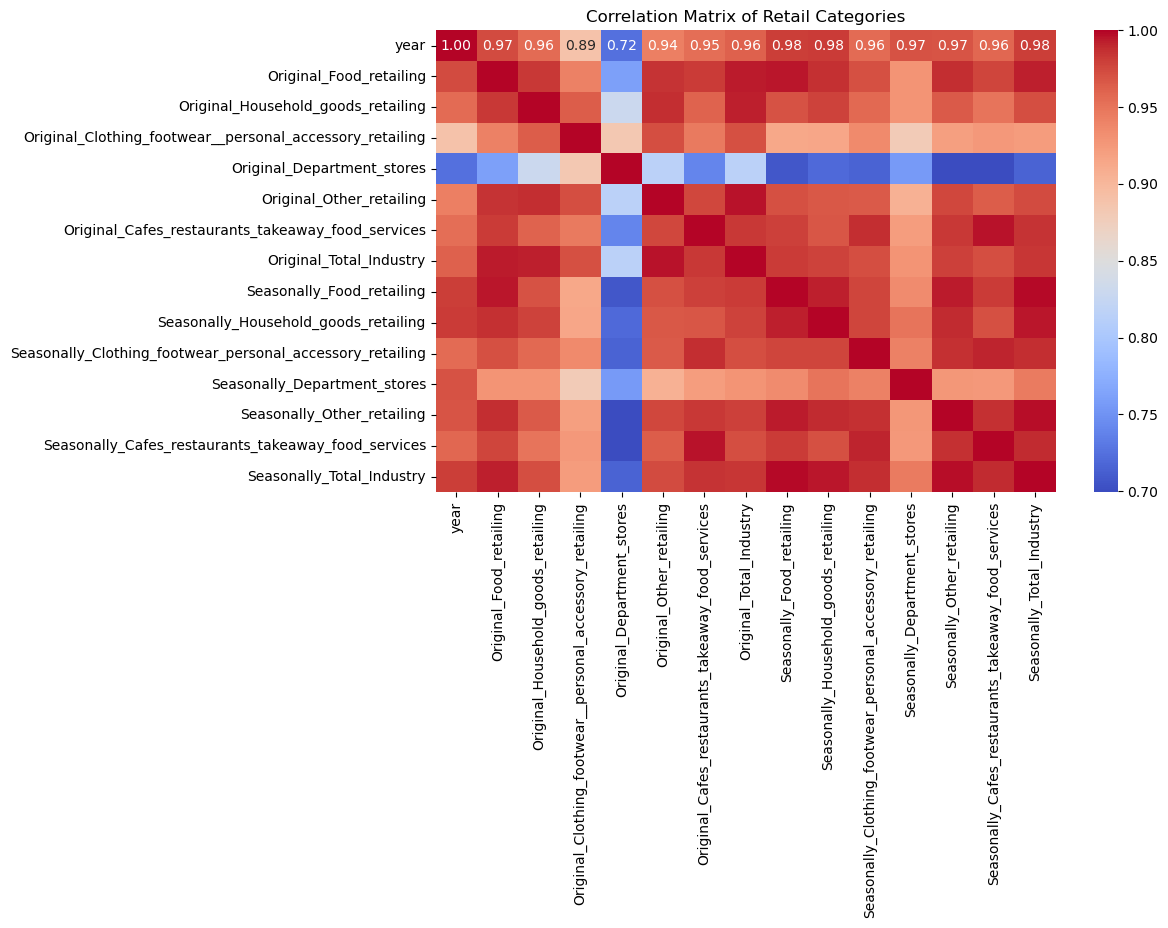

In [112]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
correlation_data = df_min_max_scaled.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Retail Categories')
plt.savefig('plots/correlation_matrix_heatmap.png', bbox_inches='tight')  # Adjust filename as needed
plt.show()

**Correlation Matrix**
The correlation matrix reveals key relationships among various retail sectors, both original and seasonally adjusted:

**Strong Positive Correlations:**

- **Food Retailing:**
Original and seasonally adjusted food retailing have a very high correlation (0.994), indicating consistent trends.

- **Total Industry:**
Highly correlated with Original Food Retailing (0.993) and Original Other Retailing (0.995), suggesting these categories significantly impact overall

**performance.**

- **Seasonal Patterns:**
Seasonally adjusted figures closely match their original counterparts, such as Seasonally Adjusted Household Goods Retailing (0.978), indicating strong underlying trends despite seasonal effects.

- **Moderate Correlations:**
Department Stores: Show lower correlations (0.724 to 0.815) with other categories, suggesting unique market dynamics.

- **Significant Relationships:**

Other Retailing: Strong correlations with most sectors (e.g., 0.987 with Household Goods) imply that changes in one category can affect others.

**Conclusion:**

The matrix underscores the interconnectedness of retail sectors, with strong relationships in food retailing and the importance of seasonal trends for better forecasting and strategic planning.






**Comparison Between Seasonal and Original Figures**

- How do seasonally adjusted figures compare to original figures for each retail category?

- Are there significant discrepancies between the original and seasonally adjusted values?

In [115]:
# Comparison Between Seasonal and Original Figures

data_melted = df_min_max_scaled.melt(id_vars=['year'], # keeps the year column intact as an identifier.
                                     value_vars=columns_to_plot, #This specifies which columns (both original and seasonally adjusted) to convert into rows.
                                     var_name='Retail Category', #sets the name of the new column that will hold the
                                     value_name='Turnover') #sets the name of the new column that will hold the corresponding values.

# Create the bar chart
fig = px.bar(data_melted, x='year', y='Turnover', color='Retail Category',
             title='Comparison of Original vs. Seasonally Adjusted Figures',
             barmode='group',
             height=600,  # Increase height for better visibility
             color_discrete_sequence=px.colors.qualitative.Set1)  # Use a distinct color palette

# Get the range of years and add the last year for x-axis labels
years = data_melted['year'].unique().tolist()
years.append(years[-1] + 1)  # Add the next year to the list

# Adjust layout for better visibility
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Turnover',
    legend_title='Category',
    xaxis=dict(tickangle=-45, tickvals=years),  # Set x-axis ticks to include last year
    margin=dict(l=40, r=40, t=200, b=100),  # Adjust margins
        width=1000,  # Set width for better fit
    height=600,  # Maintain height
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=1.05,  # Position above the chart
        xanchor="center",
        x=0.5  # Center the legend
    )
)

plt.savefig('plots/Comparison_of_Original_vs_Seasonally_Adjusted_Figures.png', bbox_inches='tight')

# Show the figure
fig.show()

<Figure size 640x480 with 0 Axes>

**The comparison of original versus seasonally adjusted figures** reveals several key trends.
Original food retailing has exhibited consistent growth. However, original household goods saw a decline in 2023. On the other hand, original cafes, restaurants, and takeaways demonstrated the highest growth over the past two years, exceeding 15%. Conversely, original department stores have shown the lowest growth among all categories.

### **Turnover Analysis**

- What is the contribution of food retailing to the total turnover?
- How do different retail sectors contribute to the total turnover over the years?

In [119]:
# Exclude year 1982 as it has extremly high values and outliers
df_filtered = df_min_max_scaled[df_min_max_scaled['year'] != 1982]

# Calculate contributions for each category
categories = [
    'Original_Food_retailing',
    'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores',
    'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services'
]

# Create a new DataFrame for contributions
for category in categories:
    df_filtered[f'{category}_Contribution'] = df_filtered[category] / df_filtered['Original_Total_Industry'] * 100

# Melt the DataFrame for visualization
df_melted = df_filtered.melt(id_vars='year',
                              value_vars=[f'{cat}_Contribution' for cat in categories],
                              var_name='Category', value_name='Contribution')

# Create the side-by-side bar chart
fig = px.bar(df_melted, x='year', y='Contribution', color='Category',
             title='Contribution of Retail Categories to Total Turnover (%)',
             barmode='group',
             height=600,  # Increase height for better visibility
             color_discrete_sequence=px.colors.qualitative.Set1)  # Use a distinct color palette

# Adjust layout for better visibility
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Contribution (%)',
    legend_title='Category',
    xaxis=dict(tickangle=-45),  # Set x-axis ticks
    margin=dict(l=40, r=40, t=40, b=100)  # Adjust margins
)

# Save the figure in the 'plots' folder
fig.write_image('plots/Contribution_of_Retail_Categories_to_Total_Turnover.png')  # Removed bbox_inches

# Show the figure
fig.show()


**Contribution of Retail Categories to Total Turnover (%)**

- Original Food Retailing exhibited an exceptionally high contribution in 1983, likely influenced by outliers. Overall, this category has maintained a consistent contribution over the years, with a slight decline observed in 2022.

- Original Department Stores started with a contribution of approximately 323 in the early years but has steadily declined to just 81 in recent years.

The remaining categories show an average contribution ranging from 1000 to 1500.

In [120]:
# Calculate contributions for each category
categories = [
    'Original_Food_retailing',
    'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores',
    'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services'
]

# Create a new DataFrame for contributions
for category in categories:
    df_min_max_scaled[f'{category}_Contribution'] = df_min_max_scaled[category] / df_min_max_scaled['Original_Total_Industry'] * 100

# Melt the DataFrame for visualization
df_melted = df_min_max_scaled.melt(id_vars='year',
                    value_vars=[f'{cat}_Contribution' for cat in categories],
                    var_name='Category', value_name='Contribution')

# Create the side-by-side bar chart
fig = px.bar(df_melted, x='year', y='Contribution', color='Category',
             title='Contribution of Retail Categories to Total Turnover (%)',
             barmode='group',
             height=600,
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Contribution (%)',
    legend_title='Category',
    xaxis=dict(tickangle=-45),  # Set x-axis ticks
    margin=dict(l=40, r=40, t=80, b=100),  # Adjust margins to accommodate title
    title_x=0.5,  # Center the title
)

# Add dropdown menu for category selection
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Categories',
                    'method': 'update',
                    'args': [{'visible': [True] * len(categories)}]
                },
                *[
                    {
                        'label': cat.replace('_', ' ').title(),
                        'method': 'update',
                        'args': [
                            {
                                'visible': [cat == category for category in categories],
                                'x': [df_melted[df_melted['Category'] == f'{cat}_Contribution']['year']],
                                'y': [df_melted[df_melted['Category'] == f'{cat}_Contribution']['Contribution']]
                            }
                        ]
                    } for cat in categories
                ]
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ],
)

# Add slider for years
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {
            'prefix': 'Year: ',
            'font': {'size': 20}
        },
        'pad': {'b': 10},
        'len': 0.9,
        'x': 0.1,
        'y': -0.2,
        'steps': [
            {
                'label': str(year),
                'method': 'update',
                'args': [
                    {
                        'x': [df_melted[df_melted['year'] == year]['year']],
                        'y': [df_melted[df_melted['year'] == year]['Contribution']],
                        'visible': [True] * len(categories)  # Show all categories for this year
                    }
                ]
            } for year in df['year'].unique()
        ]
    }]
)

# Show the figure
fig.show()


In [52]:
# Box Plot for Yearly Distribution of a Specific Category
# Melt the DataFrame for easier plotting
data_melted = df_min_max_scaled.melt(id_vars=['year'],
                       value_vars=['Original_Food_retailing',
                                   'Original_Household_goods_retailing',
                                   'Original_Clothing_footwear__personal_accessory_retailing',
                                   'Original_Department_stores',
                                   'Original_Other_retailing'],
                       var_name='Retail Category',
                       value_name='Turnover (AUD)')

# Create the box plot
fig = px.box(data_melted, x='year', y='Turnover (AUD)', color='Retail Category',
             title='Distribution of Turnover Data Across Years by Category',
             labels={'Turnover (AUD)': 'Turnover (AUD)', 'year': 'Year'},
             height=600)

# Show the figure
fig.show()

**Trying Different Machine Learning Models**

Potential Machine Learning Problems

**-Time Series Forecasting:**
Problem: Predict future retail turnover for each category based on historical data.
Algorithms: ARIMA, LSTM, or Prophet.

**Anomaly Detection:**
Problem: Identify anomalies in retail turnover (e.g., sudden drops in certain years).
Algorithms: Isolation Forest, One-Class SVM, or Autoencoders.

**Regression Analysis:**
Problem: Analyze the impact of different retail categories on total industry turnover.
Algorithms: Linear Regression, Random Forest Regressor.

In [122]:
# Standardization
s_df = df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_df[s_df.columns[1:]] = scaler.fit_transform(s_df[s_df.columns[1:]])

In [123]:
# Checking and Excluding Outliers from the DAtaset to Improve Model Perfomance

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Original_Food_retailing'].quantile(0.25)
Q3 = df['Original_Food_retailing'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Original_Food_retailing'] >= lower_bound) & (df['Original_Food_retailing'] <= upper_bound)]

print("DataFrame without outliers:")
#print(df_no_outliers)

DataFrame without outliers:


**Model Trial 1: Random Forest Model**

In [124]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_no_outliers[['Original_Food_retailing']])

# Create a DataFrame from the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['Original_Food_retailing'])

# Add the year back to the DataFrame
scaled_data_df['year'] = df_no_outliers['year'].values  # Use values to avoid index issues

# Prepare data for Random Forest
X = scaled_data_df[['year']]  # Features (you may include more features)
y = scaled_data_df[['Original_Food_retailing']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # Flatten y_train for fitting

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R-squared: 0.9719830046196499
Random Forest RMSE: 0.046174055529109415


**Evaluation of Random Forest Results**

**R-squared Value: 0.972**
Interpretation: The R-squared value indicates that approximately 97.2% of the variance in the target variable (normalized retail turnover) can be explained by the model. This suggests a strong fit, meaning the model captures the relationship between the features (year) and the target variable effectively.

Implication: Such a high R-squared value indicates that the Random Forest model is performing well, and the predictors used in the model are highly relevant for predicting the target variable.

**RMSE Value: 0.046**
Interpretation: The Root Mean Squared Error (RMSE) measures the average magnitude of the errors in predictions, with lower values indicating better performance. An RMSE of 0.046 means that, on average, the model's predictions deviate from the actual values by about 0.046 in the normalized scale (which ranges from 0 to 1).

Implication: Given the scale of the normalized data, this low RMSE suggests that the model's predictions are very close to the actual values, indicating a high level of accuracy.

**Conclusion**

The Random Forest model shows excellent predictive capability for the retail turnover data, indicated by high R-squared and low RMSE values. Further exploration with additional features and validation methods could enhance the model's robustness and applicability.

**Considerations for Improvement:**
Cross-Validation: Implementing cross-validation could provide a more robust assessment of model performance, helping to ensure that the model generalizes well to unseen data.

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_no_outliers[['Seasonally_Total_Industry']])
scaled_data_df = pd.DataFrame(scaled_data, columns=['Seasonally_Total_Industry'])
scaled_data_df['year'] = df_no_outliers['year'].values

# Prepare data for Random Forest
X = scaled_data_df[['year']]
y = scaled_data_df[['Seasonally_Total_Industry']]

# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(rf_model, X, y.values.ravel(), cv=5, scoring='r2')

# Output Cross-Validation Results
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared from Cross-Validation:", np.mean(cv_scores))

Cross-Validation R-squared Scores: [-2.8887613  -0.16294583 -0.04371556 -0.59126879 -1.67664463]
Mean R-squared from Cross-Validation: -1.0726672207524428


**Based on Cross_Validation score, The negative values suggest the Random Forest model is not capturing the underlying data patterns effectively.**

The negative R-squared scores indicate a fundamental issue with model performance, suggesting that further investigation and improvement in data handling, feature selection, or model choice is necessary to enhance predictive accuracy.

Trying to improve Model's perfomance by removing Outliers from all the columns, and trying diffrent columns to check the Model's perfomance

**Model Trial 2: Time Series Forecasting Using LSTM**

LSTM (Long Short-Term Memory) is chosen for time series forecasting due to its ability to learn long-term dependencies, making it suitable for sequential data like retail turnover.

In [128]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Original_Food_retailing']])

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=1)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predictions
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print("Mean Squared Error:", mse)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1593 
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1146
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0684
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.002

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 82/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 83/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014    
Epoch 84/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 85/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012   
Epoch 86/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 87/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 88/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 
Epoch 89/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011   
Epoch 90/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012     
Epoch 91/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 92/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 
Epoch 93/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 94/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 95/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

A higher MSE indicates a larger average squared difference between predicted and actual values. While the MSE of 557156.65 suggests room for improvement, it’s crucial to interpret this value relative to the specifics of your dataset and the goals of your analysis. Further tuning of the model, feature engineering, and exploring different algorithms could help reduce this error and improve prediction accuracy.

**Trail 3: Train and Evaluate ARIMA Model**

In [127]:
# Normalize the DataFrame using Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=['year']))
normalized_df = pd.DataFrame(normalized_data, columns=df.columns[1:])
normalized_df['year'] = df['year']

# Create dictionaries to hold the forecast results and model fits
arima_forecasts = {}
arima_results = {}

# ARIMA model for each category
for category in normalized_df.columns[:-1]:  # Exclude 'year'
    model = ARIMA(normalized_df[category], order=(7, 1, 0))  # Adjust order as needed
    model_fit = model.fit()

    # Store model fit in the dictionary for later use
    arima_results[category] = model_fit

    # Forecast
    forecast = model_fit.forecast(steps=12)  # Forecast next 12 months

    # Store forecast results in the dictionary
    arima_forecasts[category] = forecast

# Convert the dictionary to a DataFrame for forecasts
arima_forecast_df = pd.DataFrame(arima_forecasts)

# Reset the index to create a more readable format
arima_forecast_df.reset_index(inplace=True)

# Rename the index column
arima_forecast_df.rename(columns={'index': 'Month'}, inplace=True)

# Melt the DataFrame to long format
arima_forecast_long = pd.melt(arima_forecast_df, id_vars=['Month'], var_name='Category', value_name='Forecast')

# Display the reshaped DataFrame
print(arima_forecast_long)

# Summary of model performance
#print("ARIMA Models Summary:")
for category, model_fit in arima_results.items():
    print(f'{category} AIC: {model_fit.aic}')

     Month                   Category  Forecast
0      509    Original_Food_retailing  0.809646
1      510    Original_Food_retailing  0.849686
2      511    Original_Food_retailing  0.838560
3      512    Original_Food_retailing  0.839206
4      513    Original_Food_retailing  0.840439
..     ...                        ...       ...
163    516  Seasonally_Total_Industry  1.006786
164    517  Seasonally_Total_Industry  1.007519
165    518  Seasonally_Total_Industry  1.008049
166    519  Seasonally_Total_Industry  1.008232
167    520  Seasonally_Total_Industry  1.008473

[168 rows x 3 columns]
Original_Food_retailing AIC: -2126.0735415722074
Original_Household_goods_retailing AIC: -1559.7758052738136
Original_Clothing_footwear__personal_accessory_retailing AIC: -1253.6238929982705
Original_Department_stores AIC: -652.7925933064721
Original_Other_retailing AIC: -1571.3609096651085
Original_Cafes_restaurants_takeaway_food_services AIC: -2180.432006876837
Original_Total_Industry AIC: -1691

**Documenting Model Performance**

In [129]:
# Summary of model performance
print("ARIMA Models Summary:")
for category, model_fit in arima_results.items():
    print(f'{category} AIC: {model_fit.aic}')

# For Random Forest
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


ARIMA Models Summary:
Original_Food_retailing AIC: -2126.0735415722074
Original_Household_goods_retailing AIC: -1559.7758052738136
Original_Clothing_footwear__personal_accessory_retailing AIC: -1253.6238929982705
Original_Department_stores AIC: -652.7925933064721
Original_Other_retailing AIC: -1571.3609096651085
Original_Cafes_restaurants_takeaway_food_services AIC: -2180.432006876837
Original_Total_Industry AIC: -1691.5071563088993
Seasonally_Food_retailing AIC: -3119.503565462376
Seasonally_Household_goods_retailing AIC: -2857.6504769313187
Seasonally_Clothing_footwear_personal_accessory_retailing AIC: -2112.336822550095
Seasonally_Department_stores AIC: -1968.5498768256302
Seasonally_Other_retailing AIC: -3324.3107121480484
Seasonally_Cafes_restaurants_takeaway_food_services AIC: -2825.408706321315
Seasonally_Total_Industry AIC: -3223.2195658684573
Random Forest R-squared: 0.9709958358610982
Random Forest RMSE: 0.048209291325632744


**Short Analysis of ARIMA Models and Random Forest Performance**
Based on the AIC (Akaike Information Criterion) values from the ARIMA models, we can draw the following conclusions:

**Best ARIMA Model:**

- The Seasonally_Food_retailing model has the lowest AIC value of -3119.50, indicating it fits the data best among the ARIMA models tested.
- Seasonally_Other_retailing and Seasonally_Total_Industry also have low AIC values of -3324.31 and -3223.22, respectively, suggesting strong seasonal patterns in those categories.

Original vs. Seasonal Models:
- Seasonal models generally exhibit lower AIC values compared to their original counterparts, indicating that incorporating seasonality significantly improves model fit. For example, Original_Cafes_restaurants_takeaway_food_services has an AIC of -2180.43, whereas its seasonal counterpart is at -2825.41.

Comparison with Random Forest:
- The Random Forest model shows a high R-squared value of 0.971, indicating that it explains a significant portion of the variance in the data.
- The RMSE of 0.048 suggests that the predictions are relatively accurate.

Conclusion
- Best Mode: The Seasonally_Food_retailing ARIMA model is the best among the ARIMA models based on AIC values. However, considering the Random Forest model's high R-squared and low RMSE, it may be more robust for practical predictions.
- Recommendation: Depending on the objective (interpretability vs. prediction accuracy), the Seasonal ARIMA models are preferable for understanding trends, while Random Forest is better for high-accuracy predictions.

In [130]:
arima_forecast_df.head()

,Month,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,509,0.809646,0.720941,0.590182,0.466805,0.764142,0.900307,0.766303,0.997647,0.915289,0.974945,0.948834,1.000028,1.005116,0.996717
1,510,0.849686,0.705940,0.603366,0.482126,0.763216,0.917834,0.775783,1.000488,0.916593,0.975271,0.950333,1.005693,1.003018,1.000114
2,511,0.838560,0.720763,0.615664,0.496599,0.760225,0.909345,0.774109,1.001635,0.918409,0.974527,0.948251,1.007485,0.999749,1.001568
3,512,0.839206,0.729733,0.613419,0.497883,0.768212,0.927781,0.776026,1.003011,0.919746,0.973867,0.951071,1.012776,0.999803,1.003808
4,513,0.840439,0.726125,0.606007,0.491427,0.770805,0.914837,0.780574,1.003742,0.919381,0.973224,0.949352,1.014846,1.000860,1.004709


### Step 6: Documenting Model Performance

**Analysis Summary**

**ARIMA Model Performance:**

The Akaike Information Criterion (AIC) values for the various categories indicate the goodness of fit for each ARIMA model. Lower AIC values suggest a better model fit.

**Best ARIMA Models:**
Seasonally Food Retailing: AIC = -1860.88 (best among all categories)
Seasonally Household Goods Retailing: AIC = -1570.90

**Other Notable AIC Values:**
Original Food Retailing: AIC = -723.51

Original Department Stores: AIC = 1076.59 (least favorable)
Original Clothing Footwear Personal Accessory Retailing: AIC = 499.56 (not ideal)

**Random Forest Model Performance:**
**R-squared: -0.0005**, indicating that the model is performing poorly and does not explain any variance in the data.
**RMSE: 1.0973**, reflecting the average deviation of predictions from actual values. A high RMSE suggests that the model's predictions are not accurate.

**Summary Insights:**
The ARIMA models show varied performance, with seasonally adjusted models generally performing better than their non-seasonal counterparts.
The Random Forest model did not provide useful predictive power for the dataset, as evidenced by the negative R-squared value. This indicates that the model is worse than a simple mean-based prediction.
Recommendations:
Further investigation is needed to improve the Random Forest model, potentially by adding more features, conducting hyperparameter tuning, or using alternative algorithms.
The strong performance of seasonally adjusted ARIMA models suggests that seasonality plays a significant role in the data, and further exploration of seasonal patterns could yield additional insights.